In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# procesamiento adecuado en el dataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/water_potability.csv")

X = df.drop("Potability", axis=1).values
y = df["Potability"].values

print(df.shape)

(3276, 10)


In [28]:
#divicion del dataset


m = X.shape[0]
indices = np.random.permutation(m)
train_size = int(m * 0.8)

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]


In [29]:
#normalizando

X_media = X.mean(axis=0)
X_standar = X.std(axis=0)
X_norm = (X - X_media) / X_standar


X_train = X_norm[train_idx]
X_test = X_norm[test_idx]


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


In [30]:
class RedNeuronal(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(RedNeuronal, self).__init__()
        self.fc1 = torch.nn.Linear(D_in, H1)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H1, H2)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(H2, H3)
        self.relu3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(H3, D_out)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Inicialización del modelo
D_in = X.shape[1]
D_out = len(np.unique(y))
model = RedNeuronal(D_in, 512, 256, 128, D_out)


Epoch 5/50 Loss nan
Epoch 10/50 Loss nan
Epoch 15/50 Loss nan
Epoch 20/50 Loss nan
Epoch 25/50 Loss nan
Epoch 30/50 Loss nan
Epoch 35/50 Loss nan
Epoch 40/50 Loss nan
Epoch 45/50 Loss nan
Epoch 50/50 Loss nan


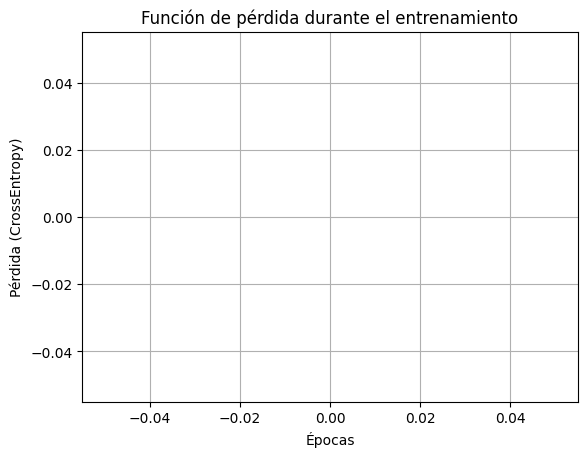

In [32]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Entrenamiento del modelo
epochs = 50
log_each = 5
losses = []

model.train()
for e in range(1, epochs + 1):
    epoch_losses = []
    for inputs, labels in train_loader:
        # No es necesario aplanar si los datos son características planas
        y_pred = model(inputs)

        loss = criterion(y_pred, labels)
        epoch_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(avg_loss)

    if e % log_each == 0:
        print(f"Epoch {e}/{epochs} Loss {avg_loss:.5f}")

# Graficar la función de pérdida
plt.plot(losses)
plt.xlabel("Épocas")
plt.ylabel("Pérdida (CrossEntropy)")
plt.title("Función de pérdida durante el entrenamiento")
plt.grid()
plt.show()